# DiscreteZOO



In [8]:
import discretezoo
discretezoo.DEFAULT_DB.importDB("discretezoo.db")

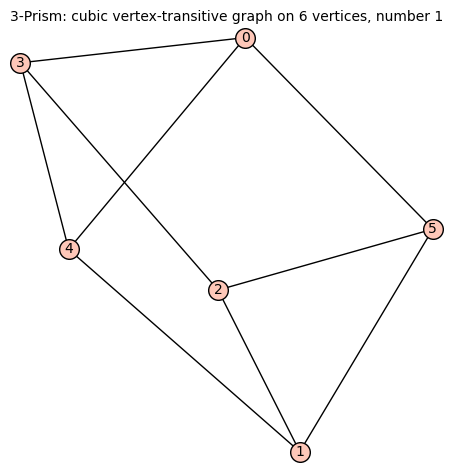

In [10]:
from discretezoo.entities.cvt import CVTGraph

G = CVTGraph(10, 3) # Petersen graph
# This returns a CVTGraph object with cached properties returned from the database
G.is_isomorphic(graphs.PetersenGraph()) # True
G.girth() # Returns the girth of G from the database.
G.is_cayley() # Returns whether G is a Cayley graph

from discretezoo.entities.cvt import info # The object providing query methods
from discretezoo.entities.cvt.fields import * # The fields relevant for CVT graphs
from discretezoo.db.query import * # Additional objects useful for querying

info.count() # The number of CVT graphs in the database
info.count(diameter == 5) # The number of CVT graphs with diameter 5
info.count(diameter == 5, girth == 7) # The number of CVT graphs with diameter 5 and girth 7
info.count(diameter == 5, groupby = girth) # The number of CVT graphs with diameter 5 broken down by girth
info.count(groupby = [girth, diameter]) # The number of CVT graphs for each (girth, diameter) pair
info.count(order < 500) # The number of CVT graphs of order less than 500
info.count(V(500) > order) # Same as above - note that an Expression must appear on the left side of a comparison!
info.count(girth + diameter == 10) # The number of CVT graphs whose girth and diameter sum to 10
info.count((girth == 8) | (diameter == 10)) # The number of CVT graphs with girth 8 or diameter 10 - note that | has high precedence, so parentheses must be used
info.count((girth == 8) | ((diameter == 10) & (order < 100))) # In nested expressions, & should be used for conjunction

gen = info.all(girth == 5, orderby = order) # CVT graphs with girth 5 ordered by their order
G1 = next(gen) # CVT(10, 3) = Petersen graph
G2 = next(gen) # CVT(20, 6) = Dodecahedron
G3 = next(gen) # CVT(30, 10)
F1, F2 = info.all(girth + diameter == order) # both CVT graphs with the order equal to the sum of girth and diameter

# The list of all CVT graphs of diameter 6, sorted first by descending girth and then by ascending order
L = list(info.all(diameter == 6, orderby = [Desc(girth), Asc(order)]))

H1 = info.one(order = 288, orderby = Desc(girth)) # A CVT graph of order 288 with largest girth
H2 = info.one(order = 288, orderby = Desc(girth), offset = 1) # A second such graph
H3 = info.one(girth >= 6, diameter == 4) # A graph with girth at least 6 and diameter 4

L = list(info.props(~is_cayley, girth == 13)) # the data on non-Cayley CVT graphs with girth 13
H = CVTGraph(L[0]) # constructing a graph from the data

from discretezoo import info # discretezoo.info is an alias for discretezoo.entities.zoograph.info
info.count() # The number of all graphs in the database